### Ajustando los gráficos

Para terminar, un punto importante a la hora de comunicar con nuestros gráficos es que sean fáciles de interpretar y que la estética sea adecuada para visualizar la información. Seaborn ofrece varias opciones para completar y mejorar la presentación de nuestros gráficos de forma sencilla.

Los objetos gráficos que devuelven las funciones de Seaborn constan a su vez de dos partes, un objeto que representa los ejes (`axes`) y otro objeto que representa la figura (`figure`). Podremos modificar propiedades del gráfico a través de estos objetos.

#### Estilos y temas

Seaborn incluye cinco temas gráficos predefinidos con distintas configuraciones de estilos para usar directamente con nuestras figuras. En la siguiente tabla tienes el listado de temas.

| Tema gráfico |
|:------------:|
| `darkgrid`   |
| `whitegrid`  |
| `dark`       |
| `white`      |
| `ticks`      |

Estos temas ajustan elementos gráficos como el color de fondo, líneas de guía, ejes y marcas, leyenda, etc. Para especificar qué tema queremos aplicar, empleamos la función `sns.set_style()`.

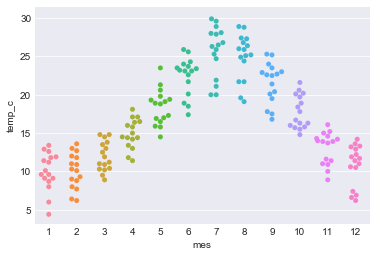

In [ ]:
sns.set_style('darkgrid')
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes)

Sobre un tema podemos introducir nuestros propios ajustes. La función `sns.set_style()` admite que le pasemos un diccionario con nuestras configuraciones de elementos particulares del gráfico.

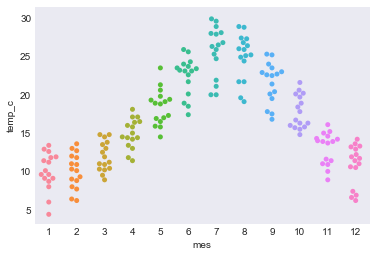

In [ ]:
sns.set_style('darkgrid', 
              rc = {'axes.grid': False})
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes)

Puedes consultar la configuración actual con `sns.axes_style()`.

In [ ]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

#### Tamaño de la figura

Dependiendo del contexto en el que vayamos a integrar nuestras gráficas necesitaremos ajustar su tamaño. Una forma de hacerlo es mediante `set_size_inches()`.

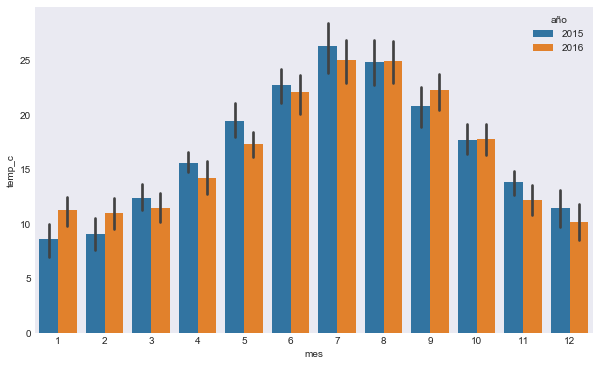

In [ ]:
sns.barplot(x='mes', y='temp_c', hue='año', data=meteo_mes).figure.set_size_inches(10,6)

#### Colores

Seaborn también nos permite configurar la paleta de colores que queremos aplicar a nuestros gráficos. Dependiendo del tipo de variables que vayamos a representar, se adaptarán mejor unas paletas u otras.

Para seleccionar la paleta de colores usaremos la función `sns.color_palette()` o alguna de sus derivadas.

##### Variables categóricas

Para pintar variables cualitativas o de valores discretos, las paletas más comunes son `"hsl"` y `"husl"`, que tratan de diferenciar al máximo el tono (_hue_) para cada categoría.

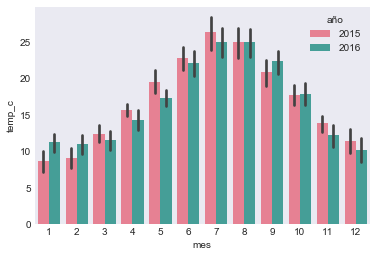

In [ ]:
# Seleccionar dos colores de la paleta "husl"
with sns.color_palette("husl", 2): 
    sns.barplot(x='mes', y='temp_c', hue='año', data=meteo_mes)

También podemos definir nosotros mismos los colores a utilizar manualmente con `sns.xkcd_palette()`.

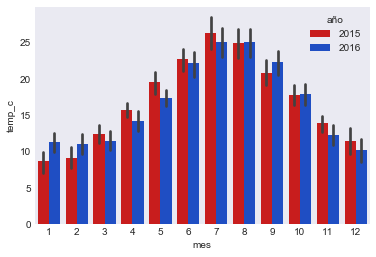

In [ ]:
with sns.xkcd_palette(["red","blue"]): 
    sns.barplot(x='mes', y='temp_c', hue='año', data=meteo_mes)

##### Variables continuas

Si vamos a mostrar una variable continua, nos interesan paletas que varíen el color de forma gradual, ya sea por tono, luminosidad, saturación, etc.

La función `sns.light_palette()` crea una escala a partir de un color base, graduando la saturación.

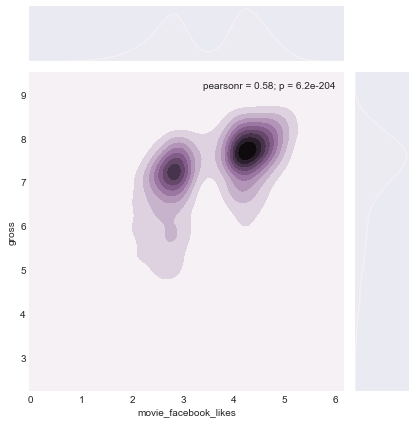

In [ ]:
with sns.light_palette("muted purple", input="xkcd"):
    sns.jointplot('movie_facebook_likes', 'gross', data = np.log10(movies_fb), kind="kde")

Si queremos incrementar el contraste, podemos usar `sns.cubehelix_palette()`. Esta función crea una paleta graduando el tono y el brillo.

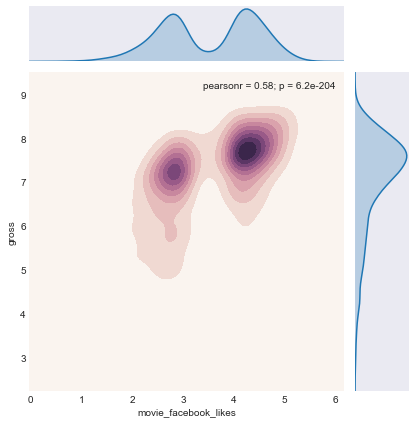

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.jointplot('movie_facebook_likes', 'gross', data = np.log10(movies_fb), kind="kde", cmap=cmap)

#### Títulos

Para fijar el título de una gráfica simple, utilizamos el método `set_title()`.

Text(0.5,1,'Temperaturas mensuales observadas')

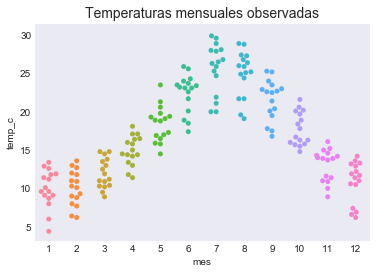

In [ ]:
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes).set_title("Temperaturas mensuales observadas", fontsize=14)

#### Ejes

Igualmente, si queremos modificar las etiquetas de cada uno de los ejes, utilizamos el método `set()`, indicando los valores para `xlabel` e `ylabel`.

[Text(0,0.5,'Temperatura (ºC)'), Text(0.5,0,'Mes')]

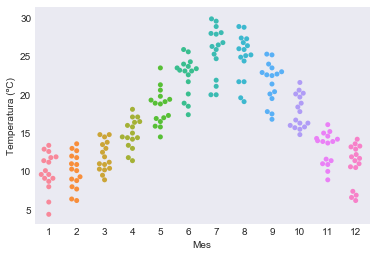

In [ ]:
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes).set(xlabel="Mes", ylabel="Temperatura (ºC)")